In [2]:
def set_size(width_pt, fraction=1, subplots=(1, 1)):
    """Set figure dimensions to sit nicely in our document.

    Parameters
    ----------
    width_pt: float
            Document width in points
    fraction: float, optional
            Fraction of the width which you wish the figure to occupy
    subplots: array-like, optional
            The number of rows and columns of subplots.
    Returns
    -------
    fig_dim: tuple
            Dimensions of figure in inches
    """
    # Width of figure (in pts)
    fig_width_pt = width_pt * fraction
    # Convert from pt to inches
    inches_per_pt = 1 / 72.27

    # Golden ratio to set aesthetic figure height
    golden_ratio = (5**.5 - 1) / 2

    # Figure width in inches
    fig_width_in = fig_width_pt * inches_per_pt
    # Figure height in inches
    fig_height_in = fig_width_in * golden_ratio * (subplots[0] / subplots[1])

    return (fig_width_in, fig_height_in)

def set_size_square(width_pt, fraction=1, subplots=(1, 1)):
    """Set figure dimensions for square subplots to sit nicely in our document.

    Parameters
    ----------
    width_pt: float
            Document width in points
    fraction: float, optional
            Fraction of the width which you wish the figure to occupy
    subplots: array-like, optional
            The number of rows and columns of subplots.
    Returns
    -------
    fig_dim: tuple
            Dimensions of figure in inches
    """
    # Width of figure (in pts)
    fig_width_pt = width_pt * fraction
    # Convert from pt to inches
    inches_per_pt = 1 / 72.27

    # Figure width in inches
    fig_width_in = fig_width_pt * inches_per_pt

    # Figure height in inches, calculated to make subplots square
    # The height of the total figure is the width multiplied by the ratio of rows to columns.
    fig_height_in = fig_width_in * (subplots[0] / subplots[1])

    return (fig_width_in, fig_height_in)

# import matplotlib as mpl
# mpl.use('pgf')
import matplotlib.pyplot as plt
import numpy as np
import os
import re
import pandas as pd
import plotly.graph_objects as go
from scipy.optimize import curve_fit

# Update matplotlib settings
plt.rcParams.update({
    "font.family": "serif",
    "text.usetex": True, # Enable TeX rendering
    "pgf.rcfonts": False
})
plt.rcParams['font.size'] = 12
# The amsmath package is needed for \text{}, fontenc is for font encoding
# Fix the LaTeX preamble to define mathdefault and include necessary packages
plt.rcParams["text.latex.preamble"] = r"""
\usepackage[T1]{fontenc}
\usepackage{amsmath}
\usepackage{amsfonts}
\def\mathdefault#1{#1}
"""

# Angle Series C200 at 0.8kV PSD:

## File Import Stuff

In [5]:
import os

# Get a list of all entries in the current directory
all_entries = os.listdir('.')

# Filter the list to include only files that end with '.psd'
file_list = [entry for entry in all_entries if entry.endswith('.psd')]

# Display the list of files
print("Files found:")
for file_name in file_list:
    print(file_name)

Files found:


In [6]:
# Define a function to extract the sorting key from the filename
def get_sort_key(file_path):
    if "C200_" in file_path:
        parts = file_path.split("C200_")
        if len(parts) > 1:
            segment_after_c200 = parts[1]
            end_index = len(segment_after_c200)
            for i, char in enumerate(segment_after_c200):
                if not char.isalnum() and char != '-':
                     end_index = i
                     break
            return segment_after_c200[:end_index]
    return file_path # Return original filename if pattern not found

# Sort the file_list using the defined key function
file_list.sort(key=get_sort_key)

for current_file_path in file_list:
    print(f"Processing file: {current_file_path}")
    # The rest of the plotting code for the current file will go here in later steps

In [7]:
roughness_values = {}

for current_file_path in file_list:
    print(f"Processing file for roughness: {current_file_path}")
    roughness_rms = None  # Initialize roughness_rms for each file

    try:
        with open(current_file_path, 'r') as f:
            for line in f:
                if "roughness (rms)" in line:
                    # Split the line at the colon and take the second part
                    parts = line.split(':')
                    if len(parts) > 1:
                        value_str = parts[1].strip()
                        # Attempt to convert the value string to a float
                        try:
                            roughness_rms = float(value_str)
                            break # Stop reading lines once roughness is found
                        except ValueError:
                            print(f"Could not convert value '{value_str}' to float in {current_file_path}")

        if roughness_rms is not None:
            roughness_values[current_file_path] = roughness_rms
            print(f"Extracted roughness (rms) for {current_file_path}: {roughness_rms}")
        else:
            print(f"Could not find 'roughness (rms)' in {current_file_path}")

    except Exception as e:
        print(f"An error occurred while reading file {current_file_path}: {e}")

# Optionally, display the dictionary of roughness values
# print("\nRoughness Values Dictionary:")
# print(roughness_values)

In [8]:
roughness_values = {}

for current_file_path in file_list:
    print(f"Processing file for roughness: {current_file_path}")
    roughness_rms = None  # Initialize roughness_rms for each file

    try:
        with open(current_file_path, 'r') as f:
            for line in f:
                if "roughness (rms)" in line:
                    # Split the line at the colon and take the second part
                    parts = line.split(':')
                    if len(parts) > 1:
                        value_str = parts[1].strip()
                        # Further process the string to remove 'Rq=' and ' nm'
                        value_str = value_str.replace('Rq=', '').replace(' nm', '').strip()

                        # Attempt to convert the cleaned value string to a float
                        try:
                            roughness_rms = float(value_str)
                            break # Stop reading lines once roughness is found
                        except ValueError:
                            print(f"Could not convert cleaned value '{value_str}' to float in {current_file_path}")

        if roughness_rms is not None:
            roughness_values[current_file_path] = roughness_rms
            print(f"Extracted roughness (rms) for {current_file_path}: {roughness_rms}")
        else:
            # Check if roughness_rms is None after the loop to indicate it wasn't found
            if "roughness (rms)" not in open(current_file_path).read():
                 print(f"Could not find 'roughness (rms)' in {current_file_path}")


    except Exception as e:
        print(f"An error occurred while reading file {current_file_path}: {e}")

# Optionally, display the dictionary of roughness values
# print("\nRoughness Values Dictionary:")
# print(roughness_values)

In [9]:
skip_rows_dict = {}

for current_file_path in file_list:
    print(f"Processing file to find data start: {current_file_path}")
    skip_rows = 0
    found_data_start = False
    try:
        with open(current_file_path, 'r') as f:
            for i, line in enumerate(f):
                if "spatial frequency [1/µm]        isotropic PSD [nm^4]" in line:
                    skip_rows = i + 1
                    found_data_start = True
                    break
        if found_data_start:
            skip_rows_dict[current_file_path] = skip_rows
            print(f"Found data start in {current_file_path}. Data starts after line {i}.")
        else:
            print(f"Warning: 'spatial frequency [1/µm]        isotropic PSD [nm^4]' not found in {current_file_path}. Cannot determine skip_rows.")
            # Decide how to handle files where the data start line is not found.
            # For now, we won't add it to the dictionary, implying it might be skipped later or require manual inspection.
            # skip_rows_dict[current_file_path] = default_skip_value # Uncomment and set a default if needed.

    except Exception as e:
        print(f"An error occurred while reading file {current_file_path}: {e}")

# Optionally, display the dictionary of skip_rows values
# print("\nSkip Rows Dictionary:")
# print(skip_rows_dict)

In [10]:
# Inspect the first few lines of a sample file to find the correct data start line
sample_file = file_list[0]
print(f"Inspecting file: {sample_file}")
try:
    with open(sample_file, 'r') as f:
        for i, line in enumerate(f):
            print(f"Line {i}: {line.strip()}")
            if i > 20: # Print only the first 20 lines to avoid flooding output
                break
except Exception as e:
    print(f"An error occurred while reading sample file {sample_file}: {e}")

IndexError: list index out of range

In [ ]:
skip_rows_dict = {}

for current_file_path in file_list:
    print(f"Processing file to find data start: {current_file_path}")
    skip_rows = 0
    found_data_start = False
    try:
        with open(current_file_path, 'r') as f:
            for i, line in enumerate(f):
                if "spatial frequency [1/µm]        isotropic PSD [nm^4]" in line:
                    skip_rows = i + 1
                    found_data_start = True
                    break
        if found_data_start:
            skip_rows_dict[current_file_path] = skip_rows
            print(f"Found data start in {current_file_path}. Data starts after line {i}.")
        else:
            print(f"Warning: 'spatial frequency [1/µm]        isotropic PSD [nm^4]' not found in {current_file_path}. Cannot determine skip_rows.")

    except Exception as e:
        print(f"An error occurred while reading file {current_file_path}: {e}")

# Optionally, display the dictionary of skip_rows values
# print("\nSkip Rows Dictionary:")
# print(skip_rows_dict)

Processing file to find data start: C200_1-6_3mu.0_00000.spm.drz.psd
Processing file to find data start: C200_2-1_3mu.0_00001.spm.drz.psd
Processing file to find data start: 20250715_C200_2-2.spm.drz.psd
Processing file to find data start: 20250715_C200_2-4.spm.drz.psd
Processing file to find data start: 20250715_C200_2-5.spm.drz.psd
Processing file to find data start: 20250715_C200_2-6.spm.drz.psd
Processing file to find data start: 20250715_C200_2-7.0_00001.spm.drz.psd
Processing file to find data start: 20250715_C200_2-8.0_00000.spm.drz.psd
Processing file to find data start: 20250715_C200_2-9.0_00000.spm.drz.psd


In [ ]:
skip_rows_dict = {}

for current_file_path in file_list:
    print(f"Processing file to find data start: {current_file_path}")
    skip_rows = 0
    found_data_start = False
    try:
        with open(current_file_path, 'r') as f:
            for i, line in enumerate(f):
                # Check if the line starts with "spatial frequency" and contains "isotropic PSD"
                if line.strip().startswith("spatial frequency") and "isotropic PSD" in line:
                    skip_rows = i + 1
                    found_data_start = True
                    break
        if found_data_start:
            skip_rows_dict[current_file_path] = skip_rows
            print(f"Found data start in {current_file_path}. Data starts after line {i}.")
        else:
            print(f"Warning: Data start line not found in {current_file_path}. Cannot determine skip_rows.")

    except Exception as e:
        print(f"An error occurred while reading file {current_file_path}: {e}")

# Optionally, display the dictionary of skip_rows values
# print("\nSkip Rows Dictionary:")
# print(skip_rows_dict)

Processing file to find data start: C200_1-6_3mu.0_00000.spm.drz.psd
Found data start in C200_1-6_3mu.0_00000.spm.drz.psd. Data starts after line 8.
Processing file to find data start: C200_2-1_3mu.0_00001.spm.drz.psd
Found data start in C200_2-1_3mu.0_00001.spm.drz.psd. Data starts after line 8.
Processing file to find data start: 20250715_C200_2-2.spm.drz.psd
Found data start in 20250715_C200_2-2.spm.drz.psd. Data starts after line 8.
Processing file to find data start: 20250715_C200_2-4.spm.drz.psd
Found data start in 20250715_C200_2-4.spm.drz.psd. Data starts after line 8.
Processing file to find data start: 20250715_C200_2-5.spm.drz.psd
Found data start in 20250715_C200_2-5.spm.drz.psd. Data starts after line 8.
Processing file to find data start: 20250715_C200_2-6.spm.drz.psd
Found data start in 20250715_C200_2-6.spm.drz.psd. Data starts after line 8.
Processing file to find data start: 20250715_C200_2-7.0_00001.spm.drz.psd
Found data start in 20250715_C200_2-7.0_00001.spm.drz.ps

In [ ]:
import numpy as np

data_dict = {}

for current_file_path in file_list:
    print(f"Loading data from: {current_file_path}")
    if current_file_path in skip_rows_dict:
        skip_rows = skip_rows_dict[current_file_path]
        try:
            # Load the data from the ASCII file, skipping comments and header rows
            data = np.loadtxt(current_file_path, comments='#', skiprows=skip_rows)

            # Extract x and y columns (assuming first two columns)
            if data.ndim == 2 and data.shape[1] >= 2:
                x = data[:, 0]
                y = data[:, 1]
                data_dict[current_file_path] = {'x': x, 'y': y}
                print(f"Successfully loaded data from {current_file_path}.")
            else:
                print(f"Warning: Data in {current_file_path} is not in the expected format (at least 2 columns).")


        except Exception as e:
            print(f"An error occurred while loading data from file {current_file_path}: {e}")
            print("Please check the file format. You may need to adjust np.loadtxt parameters (e.g., skiprows).")
    else:
        print(f"Skipping data loading for {current_file_path} as skip_rows was not determined.")

# The data_dict now contains the loaded x and y data for each file
# print("\nLoaded Data Dictionary Keys:")
# print(data_dict.keys())

Loading data from: C200_1-6_3mu.0_00000.spm.drz.psd
Successfully loaded data from C200_1-6_3mu.0_00000.spm.drz.psd.
Loading data from: C200_2-1_3mu.0_00001.spm.drz.psd
Successfully loaded data from C200_2-1_3mu.0_00001.spm.drz.psd.
Loading data from: 20250715_C200_2-2.spm.drz.psd
Successfully loaded data from 20250715_C200_2-2.spm.drz.psd.
Loading data from: 20250715_C200_2-4.spm.drz.psd
Successfully loaded data from 20250715_C200_2-4.spm.drz.psd.
Loading data from: 20250715_C200_2-5.spm.drz.psd
Successfully loaded data from 20250715_C200_2-5.spm.drz.psd.
Loading data from: 20250715_C200_2-6.spm.drz.psd
Successfully loaded data from 20250715_C200_2-6.spm.drz.psd.
Loading data from: 20250715_C200_2-7.0_00001.spm.drz.psd
Successfully loaded data from 20250715_C200_2-7.0_00001.spm.drz.psd.
Loading data from: 20250715_C200_2-8.0_00000.spm.drz.psd
Successfully loaded data from 20250715_C200_2-8.0_00000.spm.drz.psd.
Loading data from: 20250715_C200_2-9.0_00000.spm.drz.psd
Successfully loaded

## Data

### Interactive

In [ ]:
import plotly.graph_objects as go

for current_file_path in file_list:
    print(f"Processing file for plotting: {current_file_path}")

    if current_file_path in data_dict and current_file_path in roughness_values:
        # Retrieve data and roughness value
        x = data_dict[current_file_path]['x']
        y = data_dict[current_file_path]['y']
        roughness_rms = roughness_values[current_file_path]

        # Extract the desired part of the filename for the title and legend
        title_part = current_file_path # Default to full filename if pattern not found
        if "C200_" in current_file_path:
            parts = current_file_path.split("C200_")
            if len(parts) > 1:
                # Take the part after 'C200_'
                segment_after_c200 = parts[1]
                # Find the end of the desired segment (before '.psd')
                psd_index = segment_after_c200.find(".psd")
                if psd_index != -1:
                    title_part = segment_after_c200[:psd_index]
                else:
                    title_part = segment_after_c200 # If .psd not found, take everything after C200_


        # Replace hyphen with a dot in the title segment
        title_part = title_part.replace('-', '.')

        # Create the interactive Plotly plot
        fig = go.Figure(data=go.Scatter(x=x, y=y, mode='lines+markers',
                                        name=f"{title_part} (RMS: {roughness_rms:.2f} nm)")) # Include roughness in legend

        # Update layout for log-log scale and titles/labels
        fig.update_layout(
            title=title_part,
            xaxis_title='Spatial Frequency (1/µm)',
            yaxis_title='Power Spectral Density (nm⁴)', # Using nm⁴ for clarity
            xaxis_type='log',
            yaxis_type='log',
            hovermode='x unified'
        )

        # Add grid lines
        fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='lightgray')
        fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='lightgray')

        # Display the plot
        fig.show()

    else:
        print(f"Skipping plotting for {current_file_path}: data or roughness value not found.")


Processing file for plotting: C200_1-6_3mu.0_00000.spm.drz.psd


Processing file for plotting: C200_2-1_3mu.0_00001.spm.drz.psd


Processing file for plotting: 20250715_C200_2-2.spm.drz.psd


Processing file for plotting: 20250715_C200_2-4.spm.drz.psd


Processing file for plotting: 20250715_C200_2-5.spm.drz.psd


Processing file for plotting: 20250715_C200_2-6.spm.drz.psd


Processing file for plotting: 20250715_C200_2-7.0_00001.spm.drz.psd


Processing file for plotting: 20250715_C200_2-8.0_00000.spm.drz.psd


Processing file for plotting: 20250715_C200_2-9.0_00000.spm.drz.psd


### Matplotlib


In [ ]:
        # Configure ticks: y-axis and top x-axis inward, bottom x-axis outward
        ax.tick_params(axis='y', which='both', direction='in', 
                      left=True, right=True)
        ax.tick_params(axis='x', which='both', direction='in', 
                      top=True, bottom=False)
        ax.tick_params(axis='x', which='both', direction='out', 
                      bottom=True, top=False)

        #ax.set_xlim(0.1,1000)

Processing file for Matplotlib plotting: C200_1-6_3mu.0_00000.spm.drz.psd
Plot saved to pgf_plots/1.6.pgf
Processing file for Matplotlib plotting: C200_2-1_3mu.0_00001.spm.drz.psd
Plot saved to pgf_plots/2.1.pgf
Processing file for Matplotlib plotting: 20250715_C200_2-2.spm.drz.psd
Plot saved to pgf_plots/2.2.pgf
Processing file for Matplotlib plotting: 20250715_C200_2-4.spm.drz.psd
Plot saved to pgf_plots/2.4.pgf
Processing file for Matplotlib plotting: 20250715_C200_2-5.spm.drz.psd
Plot saved to pgf_plots/2.5.pgf
Processing file for Matplotlib plotting: 20250715_C200_2-6.spm.drz.psd
Plot saved to pgf_plots/2.6.pgf
Processing file for Matplotlib plotting: 20250715_C200_2-7.0_00001.spm.drz.psd
Plot saved to pgf_plots/2.7.pgf
Processing file for Matplotlib plotting: 20250715_C200_2-8.0_00000.spm.drz.psd
Plot saved to pgf_plots/2.8.pgf
Processing file for Matplotlib plotting: 20250715_C200_2-9.0_00000.spm.drz.psd
Plot saved to pgf_plots/2.9.pgf


In [ ]:
def plot_afm_image(file_path):
    """
    Loads and plots a 2D AFM image from an ASCII file.
    """
    header, data = load_afm_data(file_path)

    if data is None or data.ndim != 2:
        print(f"Could not plot the data for {os.path.basename(file_path)}.")
        return

    x_len = header.get('x-length', data.shape[1])
    y_len = header.get('y-length', data.shape[0])
    z_unit = header.get('z-unit', 'a.u.')
    
    # Use a square figure size
    fig_size_in = set_size_square(540.6, fraction=0.9)
    fig, ax = plt.subplots(figsize=fig_size_in)
    
    # Get the colormap and set the color for bad (NaN) values.
    cmap = plt.get_cmap('plasma')
    cmap.set_bad(color='white')

    im = ax.imshow(data, extent=[0, x_len / 1000, 0, y_len / 1000], origin='lower', cmap=cmap)

    cbar = fig.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
    cbar.set_label(f'Height ({z_unit})')

    # Format the title from the filename
    basename = os.path.basename(file_path)
    title = basename  # Default title
    
    unetched_match = re.search(r'C200_(\d+)-Unetched_(\d+)mu', basename)
    standard_match = re.search(r'C200_(\d+-\d+)_(\d+)mu', basename)

    if unetched_match:
        sample_id = unetched_match.group(1)
        scan_size = unetched_match.group(2)
        title = fr"Sample {sample_id} Unetched -- {scan_size} $\mu$m"
    elif standard_match:
        sample_id = standard_match.group(1).replace('-', '.')
        scan_size = standard_match.group(2)
        title = fr"Sample {sample_id} -- {scan_size} $\mu$m"
    
    ax.set_title(title)
    ax.set_xlabel(r'$x$ [$\mu$m]')
    ax.set_ylabel(r'$y$ [$\mu$m]')
    
    # --- Manual DPI Calculation ---
    # Based on the observation that 217.29 DPI produced a 726px image,
    # we can calculate the DPI needed for a 1024px image.
    required_dpi = (1024 / 726) * 217.29

    print(f"Data shape: {data.shape}, Using manually calculated DPI: {required_dpi:.2f}")

    # Sanitize the title to create a valid filename
    clean_filename = re.sub(r'[\\/*?:"<>|]', "_", title)

    # Use tight_layout to ensure labels don't overlap, then save.
    fig.tight_layout(pad=0.5)
    plt.savefig(f"{clean_filename}.pgf", format="pgf", dpi=required_dpi)
    plt.show()

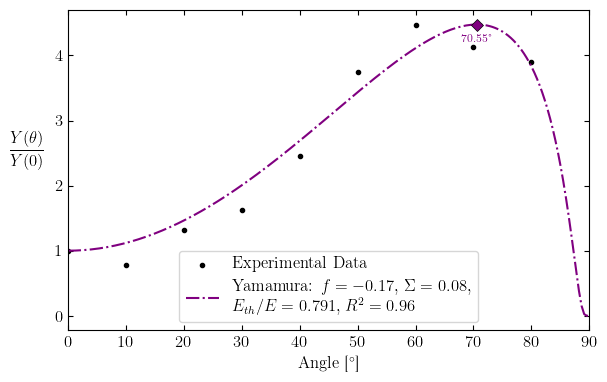

In [18]:
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit

def yamamura_extended(theta_deg, f, sigma, eth_e_ratio):
    """
    Extended Yamamura sputter yield function, fitting for the Eth/E ratio.
    theta_deg: incident angle in degrees
    f, sigma: fitting parameters
    eth_e_ratio: The ratio Eth/E
    """
    theta_rad = np.deg2rad(theta_deg)
    cos_theta = np.cos(theta_rad)
    cos_theta[cos_theta == 0] = 1e-9 # Avoid division by zero
    x = 1 / cos_theta
    
    # The ratio must be between 0 and 1 for the math to be valid
    if not (0 <= eth_e_ratio < 1):
        return np.inf

    sqrt_eth_e_ratio = np.sqrt(eth_e_ratio)
    
    term1 = (x**f) * np.exp(-sigma * (x - 1))
    term2 = (1 - sqrt_eth_e_ratio / x) / (1 - sqrt_eth_e_ratio)
    return term1 * term2

try:
    df = pd.read_excel('Series1.xlsx')

    # --- Plot for Etching Rate ---
    if 'Angle' in df.columns and 'Etching Rate (nm/min)' in df.columns:
        # Normalize by the value at Angle = 0
        etch_rate_at_0 = df[df['Angle'] == 0]['Etching Rate (nm/min)'].iloc[0]
        df['Normalized Etch Rate'] = df['Etching Rate (nm/min)'] / etch_rate_at_0

        # --- Fit Yamamura function ---
        angle_data = df['Angle'].values
        norm_etch_rate_data = df['Normalized Etch Rate'].values

        # Fit 2: Extended Yamamura with Eth/E ratio
        # Initial guesses for f, sigma, eth_e_ratio. Bounds to keep ratio between 0 and 1.
        popt2, pcov2 = curve_fit(yamamura_extended, angle_data, norm_etch_rate_data, p0=[1, 1, 0.1], bounds=([-np.inf, -np.inf, 0], [np.inf, np.inf, 1]), maxfev=30000)
        f_opt2, sigma_opt2, eth_e_ratio_opt2 = popt2
        residuals2 = norm_etch_rate_data - yamamura_extended(angle_data, *popt2)
        ss_res2 = np.sum(residuals2**2)
        ss_tot2 = np.sum((norm_etch_rate_data - np.mean(norm_etch_rate_data))**2)
        r_squared2 = 1 - (ss_res2 / ss_tot2)

        # Create the scatter plot
        plt.figure(figsize=set_size(540.6, fraction=0.9))
        plt.scatter(df['Angle'], df['Normalized Etch Rate'], color='black', marker='.', label='Experimental Data')

        # Plot the fitted curves
        angle_fit = np.linspace(min(angle_data), 90, 200)

        fit_label2 = (f'Yamamura: $f = {f_opt2:.2f}$, ' +
                     r'$\Sigma = ' + f'{sigma_opt2:.2f}$, ' + '\n'
                     f'$E_{{th}}/E = {eth_e_ratio_opt2:.3f}$, $R^2 = {r_squared2:.2f}$')
        
        # Plot second fit and find its peak
        yamamura_fit2 = yamamura_extended(angle_fit, *popt2)
        plt.plot(angle_fit, yamamura_fit2, '-.', color='purple', label=fit_label2)
        
        # Find and highlight peak of second fit
        peak2_idx = np.argmax(yamamura_fit2)
        peak2_angle = angle_fit[peak2_idx]
        peak2_yield = yamamura_fit2[peak2_idx]
        plt.plot(peak2_angle, peak2_yield, 'D', color='purple', 
                markersize=6, markeredgecolor='black', markeredgewidth=0.5)
        plt.annotate(f'{peak2_angle:.2f}°', 
                    xy=(peak2_angle, peak2_yield), 
                    xytext=(0, -7),
                    textcoords='offset points',
                    ha='center', va='top',
                    fontsize=8, color='purple',
                    weight='bold', style='italic')

        # Add labels and title
        plt.xlabel(r'Angle [$^{\circ}$]')
        plt.ylabel(r'$$\frac{Y(\theta)}{Y(0)}$$', rotation='horizontal', labelpad=20)
        # plt.title('Normalized Etch Rate vs Angle')
        plt.tick_params(axis='both', which='both', direction='in',
                      top=True, right=True, bottom=True, left=True)
        plt.xlim(0, 90)
        plt.legend()
        #plt.savefig('SputteringYield.pgf', format='pgf')
        plt.show()
    else:
        print("Error: 'Angle' or 'Etching Rate (nm/min)' column not found for the first plot.")

except FileNotFoundError:
    print("Error: 'Series1.xlsx' not found. Please make sure the file is in the correct directory.")
except IndexError:
    print("Error: Could not find a value at Angle = 0 for normalization. Please check your data.")
except RuntimeError:
    print("Error: Could not find optimal parameters for one of the fits. Consider providing different initial guesses (p0) or bounds.")
except Exception as e:
    print(f"An error occurred: {e}")

25 eV: Normalizing by 30° value = 1.60e-07
30 eV: Normalizing by 30° value = 4.44e-06
40 eV: Normalizing by 0° value = 1.80e-07
50 eV: Normalizing by 0° value = 2.46e-06
70 eV: Normalizing by 0° value = 6.64e-05
100 eV: Normalizing by 0° value = 8.27e-04
140 eV: Normalizing by 0° value = 4.62e-03
200 eV: Normalizing by 0° value = 1.66e-02
300 eV: Normalizing by 0° value = 4.54e-02
500 eV: Normalizing by 0° value = 1.09e-01
1000 eV: Normalizing by 0° value = 2.47e-01
25 eV: f=-4.90, σ=2.60, Eth/E=0.992, R²=0.912, Peak at 62.73°
30 eV: f=-3.55, σ=1.70, Eth/E=0.955, R²=0.963, Peak at 66.36°
40 eV: f=-7.10, σ=2.91, Eth/E=0.999, R²=0.994, Peak at 68.18°
50 eV: f=-7.28, σ=3.09, Eth/E=0.999, R²=0.995, Peak at 67.27°
70 eV: f=-5.27, σ=2.46, Eth/E=0.996, R²=0.992, Peak at 65.45°
100 eV: f=-4.47, σ=2.19, Eth/E=0.988, R²=0.995, Peak at 65.45°
140 eV: f=-3.96, σ=1.97, Eth/E=0.971, R²=0.996, Peak at 65.45°
200 eV: f=-3.56, σ=1.75, Eth/E=0.944, R²=0.997, Peak at 65.45°
300 eV: f=-3.14, σ=1.48, Eth/E

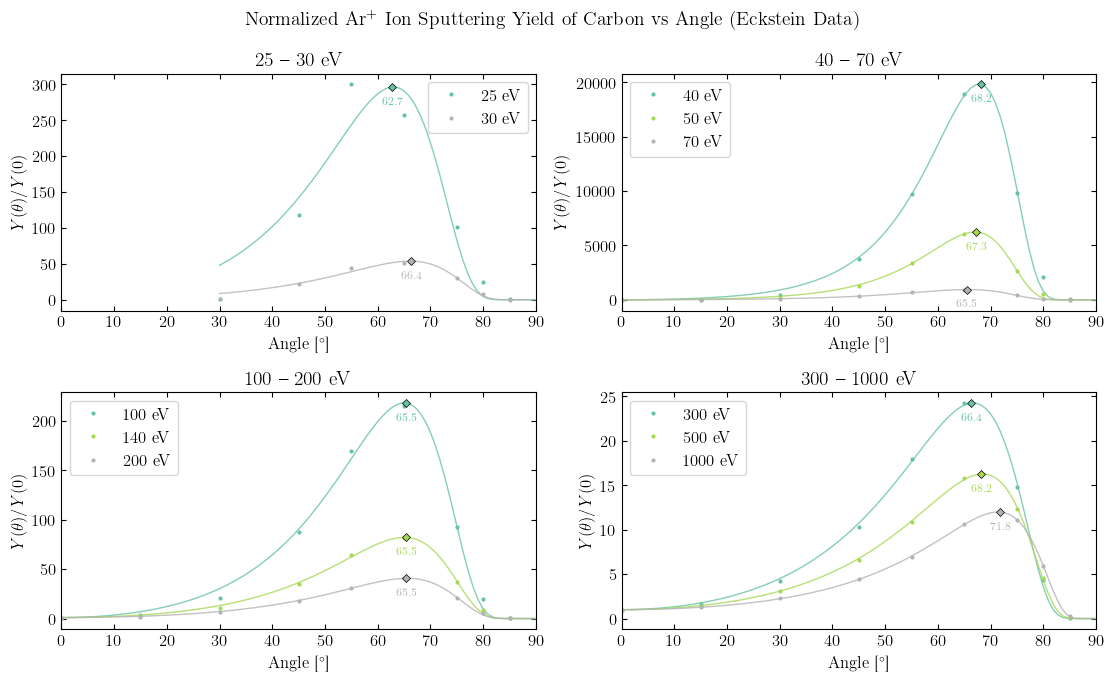

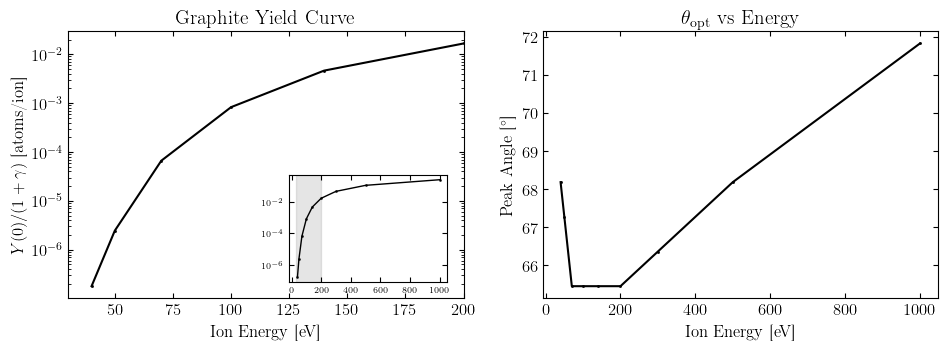

In [15]:
# ...existing code...

# Our experimental conditions: Ar+ at 0.8 kV = 800 eV
# Closest Eckstein reference: 1000 eV (within 20%)

# Eckstein data for Ar+ -> C sputtering yields - NORMALIZED
# Data extracted from the table
energies = [25, 30, 40, 50, 70, 100, 140, 200, 300, 500, 1000]  # eV
angles = [0, 15, 30, 45, 55, 65, 75, 80, 85]  # degrees

# Sputtering yield data (atoms/ion) organized by energy (rows) and angle (columns)
yield_data = np.array([
    [0, 0, 1.60e-7, 1.88e-5, 4.80e-5, 4.12e-5, 1.62e-5, 4.00e-6, 9.00e-8],  # 25 eV
    [0, 0, 4.44e-6, 9.87e-5, 1.94e-4, 2.29e-4, 1.32e-4, 3.73e-5, 7.10e-7],  # 30 eV
    [1.80e-7, 2.52e-6, 7.96e-5, 6.71e-4, 1.75e-3, 3.40e-3, 1.77e-3, 3.74e-4, 7.38e-6],  # 40 eV
    [2.46e-6, 2.31e-5, 4.18e-4, 3.20e-3, 8.35e-3, 1.49e-2, 6.49e-3, 1.33e-3, 2.35e-5],  # 50 eV
    [6.64e-5, 3.67e-4, 3.54e-3, 2.00e-2, 4.57e-2, 6.11e-2, 2.65e-2, 5.31e-3, 9.35e-5],  # 70 eV
    [8.27e-4, 2.98e-3, 1.76e-2, 7.25e-2, 1.40e-1, 1.78e-1, 7.67e-2, 1.60e-2, 2.73e-4],  # 100 eV
    [4.62e-3, 1.18e-2, 4.90e-2, 1.63e-1, 2.99e-1, 3.76e-1, 1.72e-1, 3.94e-2, 6.61e-4],  # 140 eV
    [1.66e-2, 3.34e-2, 1.05e-1, 2.94e-1, 5.21e-1, 6.75e-1, 3.46e-1, 8.68e-2, 1.53e-3],  # 200 eV
    [4.54e-2, 7.57e-2, 1.93e-1, 4.70e-1, 8.13e-1, 1.10e0, 6.73e-1, 1.96e-1, 3.94e-3],  # 300 eV
    [1.09e-1, 1.60e-1, 3.34e-1, 7.22e-1, 1.19e0, 1.73e0, 1.34e0, 4.96e-1, 1.31e-2],  # 500 eV
    [2.47e-1, 3.21e-1, 5.68e-1, 1.09e0, 1.72e0, 2.62e0, 2.75e0, 1.46e0, 6.94e-2]   # 1000 eV
])
M_i = 39.948  # Argon ion mass in atomic mass units (amu)
M_t = 12.011  # Carbon target mass in atomic mass units (amu)
A = M_t / M_i 
g = 4 * A / ((A + 1) ** 2) 


# Normalize each energy's data
normalized_yield_data = np.zeros_like(yield_data)

for i, energy in enumerate(energies):
    # For first two energies (25 and 30 eV), use 30° value for normalization (index 2)
    # For others, use 0° value for normalization (index 0)
    if i < 2:  # 25 eV and 30 eV
        norm_value = yield_data[i, 2]  # 30° value (index 2)
        print(f"{energy} eV: Normalizing by 30° value = {norm_value:.2e}")
    else:
        norm_value = yield_data[i, 0]  # 0° value (index 0)
        print(f"{energy} eV: Normalizing by 0° value = {norm_value:.2e}")
    
    # Normalize all angles for this energy
    if norm_value > 0:
        normalized_yield_data[i] = yield_data[i] / norm_value
    else:
        normalized_yield_data[i] = yield_data[i]  # Keep original if norm_value is 0

# Group energies
energy_groups = [
    [0, 1],      # 25, 30 eV
    [2, 3, 4],   # 40, 50, 70 eV
    [5, 6, 7],   # 100, 140, 200 eV
    [8, 9, 10]   # 300, 500, 1000 eV
]

group_titles = [
    "25 -- 30 eV",
    "40 -- 70 eV",
    "100 -- 200 eV",
    "300 -- 1000 eV"
]

# Create a 2x2 subplot layout
fig, axes = plt.subplots(2, 2, figsize=set_size(540.6, fraction=1.5, subplots=(2, 2)))

# Plot first 4 subplots (2x2 grid for energy groups)
for group_idx, (energy_indices, group_title) in enumerate(zip(energy_groups, group_titles)):
    row = group_idx // 2
    col = group_idx % 2
    ax = axes[row, col]
    
    # Define colors for this group
    colors = plt.cm.Set2(np.linspace(0, 1, len(energy_indices)))
    
    # Plot each energy in this group
    for color_idx, energy_idx in enumerate(energy_indices):
        energy = energies[energy_idx]
        
        # Only plot non-zero values
        valid_indices = normalized_yield_data[energy_idx] > 0
        valid_angles = np.array(angles)[valid_indices]
        valid_yields = normalized_yield_data[energy_idx][valid_indices]
        
        ax.plot(valid_angles, valid_yields, '.', color=colors[color_idx], 
                label=f'{energy} eV', markersize=4)

        # Fit extended Yamamura function to each energy curve
        try:
            # Initial guesses and bounds for f, sigma, eth_e_ratio
            popt, pcov = curve_fit(yamamura_extended, valid_angles, valid_yields, 
                                   p0=[1, 1, 0.1], 
                                   bounds=([-np.inf, -np.inf, 0], [np.inf, np.inf, 1]))
            f_opt, sigma_opt, eth_e_ratio_opt = popt
            
            # Generate smooth curve for plotting
            angle_fit = np.linspace(min(valid_angles), 90, 100)
            fit_curve = yamamura_extended(angle_fit, *popt)
            
            # Plot the fitted curve
            ax.plot(angle_fit, fit_curve, '-', color=colors[color_idx], 
                    linewidth=1, alpha=0.8)
            
            # Find peak of the fitted curve
            fit_peak_idx = np.argmax(fit_curve)
            fit_peak_angle = angle_fit[fit_peak_idx]
            fit_peak_yield = fit_curve[fit_peak_idx]
            
            # Highlight the peak of the fit with a diamond marker
            ax.plot(fit_peak_angle, fit_peak_yield, 'D', color=colors[color_idx], 
                markersize=4, markeredgecolor='black', markeredgewidth=0.5)
            
            # Add text annotation below the fit peak (consistent pixel offset)
            ax.annotate(f'{fit_peak_angle:.1f}', 
                       xy=(fit_peak_angle, fit_peak_yield), 
                       xytext=(0, -7),  # 15 pixels below the peak
                       textcoords='offset points',
                       ha='center', va='top',
                       fontsize=8, color=colors[color_idx],
                       weight='bold', style='italic')
            
            # Calculate R-squared
            residuals = valid_yields - yamamura_extended(valid_angles, *popt)
            ss_res = np.sum(residuals**2)
            ss_tot = np.sum((valid_yields - np.mean(valid_yields))**2)
            r_squared = 1 - (ss_res / ss_tot)
            
            print(f"{energy} eV: f={f_opt:.2f}, σ={sigma_opt:.2f}, Eth/E={eth_e_ratio_opt:.3f}, R²={r_squared:.3f}, Peak at {fit_peak_angle:.2f}°")
            
        except Exception as e:
            print(f"Failed to fit {energy} eV: {e}")
    
    ax.set_xlabel(r'Angle [$^{\circ}$]')
    ax.set_ylabel(r'$Y(\theta)/Y(0)$')
    ax.set_title(group_title)
    ax.legend()
    ax.tick_params(axis='both', which='both', direction='in',
                   top=True, right=True, bottom=True, left=True)
    ax.set_xlim(0, 90)

# Collect data for the bottom plots
fit_peak_angles = []
yield_at_zero = []
valid_energies = []

for energy_idx, energy in enumerate(energies):
    # Skip energies with zero yield at 0 degrees (25 and 30 eV)
    if energy_idx >= 2:  # Start from 40 eV
        valid_indices = normalized_yield_data[energy_idx] > 0
        valid_angles = np.array(angles)[valid_indices]
        valid_yields = normalized_yield_data[energy_idx][valid_indices]
        
        try:
            # Fit extended Yamamura function
            popt, pcov = curve_fit(yamamura_extended, valid_angles, valid_yields, 
                                   p0=[1, 1, 0.1], 
                                   bounds=([-np.inf, -np.inf, 0], [np.inf, np.inf, 1]))
            
            # Generate smooth curve for finding peak
            angle_fit = np.linspace(min(valid_angles), 90, 100)
            fit_curve = yamamura_extended(angle_fit, *popt)
            
            # Find peak angle
            fit_peak_idx = np.argmax(fit_curve)
            fit_peak_angle = angle_fit[fit_peak_idx]
            
            # Store data
            fit_peak_angles.append(fit_peak_angle)
            yield_at_zero.append(yield_data[energy_idx, 0])  # Original yield at 0°
            valid_energies.append(energy)
            
        except Exception as e:
            print(f"Failed to process {energy} eV for summary plots: {e}")


# Overall title for the entire figure
fig.suptitle('Normalized Ar$^+$ Ion Sputtering Yield of Carbon vs Angle (Eckstein Data)', 
             fontsize=14)

plt.tight_layout()  # Adjust layout to fit title
plt.show()

# Create separate figure for the summary plots
fig2, (ax_yield2, ax_peak2) = plt.subplots(1, 2, figsize=set_size(540.6, fraction=1.5, subplots=(1, 2)))

# Left plot: Yield at 0° vs Energy with inset
zoom_mask = np.array(valid_energies) <= 200
zoom_energies = np.array(valid_energies)[zoom_mask]
zoom_yields = np.array(yield_at_zero)[zoom_mask]

ax_yield2.semilogy(zoom_energies, zoom_yields, '.-', color='black', markersize=3, 
                  markeredgecolor='black', markeredgewidth=0.5)
ax_yield2.set_xlabel(r'Ion Energy [eV]')
ax_yield2.set_ylabel(r'$Y(0°)/(1+\gamma)$ [atoms/ion]')
ax_yield2.set_title('Graphite Yield Curve')
ax_yield2.tick_params(axis='both', which='both', direction='in',
                     top=True, right=True, bottom=True, left=True)
ax_yield2.set_xlim(30, 200)

# Create inset for full energy range - positioned higher to avoid overlap
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
inset_ax2 = inset_axes(ax_yield2, width="40%", height="40%", loc='lower right', borderpad=1)
inset_ax2.semilogy(valid_energies, yield_at_zero, '.-', color='black', markersize=3, 
                  markeredgecolor='black', markeredgewidth=0.3, linewidth=1)
inset_ax2.tick_params(axis='both', which='both', direction='in',
                     top=True, right=True, bottom=True, left=True, labelsize=6)

# Highlight the zoomed region in the inset
inset_ax2.axvspan(30, 200, alpha=0.2, color='grey')

# Right plot: Peak angle vs Energy
ax_peak2.plot(valid_energies, fit_peak_angles, '.-', color='black', markersize=3,
             markeredgecolor='black', markeredgewidth=0.5)
ax_peak2.set_xlabel(r'Ion Energy [eV]')
ax_peak2.set_ylabel(r'Peak Angle [$^{\circ}$]')
ax_peak2.set_title(r'$\theta_{\text{opt}}$ vs Energy')
ax_peak2.tick_params(axis='both', which='both', direction='in',
                    top=True, right=True, bottom=True, left=True)

# plt.tight_layout()
plt.show()